In [17]:
import pandas as pd
import toolbox_ML as tools_ML
import numpy as np
import scipy.stats as stats

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
tools_ML.tipifica_variables(df=df_titanic, umbral_categoria=10, umbral_continua=20)

,nombre_variable,tipo_variable,cardinalidad,cardinalidad_porcentaje,tipo_sugerido
0,survived,int64,2,0.22,Binaria
1,pclass,int64,3,0.34,Categórica
2,sex,object,2,0.22,Binaria
3,age,float64,88,9.88,Numérica continua
4,sibsp,int64,7,0.79,Categórica
5,parch,int64,7,0.79,Categórica
6,fare,float64,248,27.83,Numérica continua
7,embarked,object,3,0.34,Categórica
8,class,object,3,0.34,Categórica
9,who,object,3,0.34,Categórica


In [5]:
df_practica_rl = pd.read_csv("./data/obligatoria_hard.csv", sep="|")
df_practica_rl.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
df_practica_rl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


['RM']


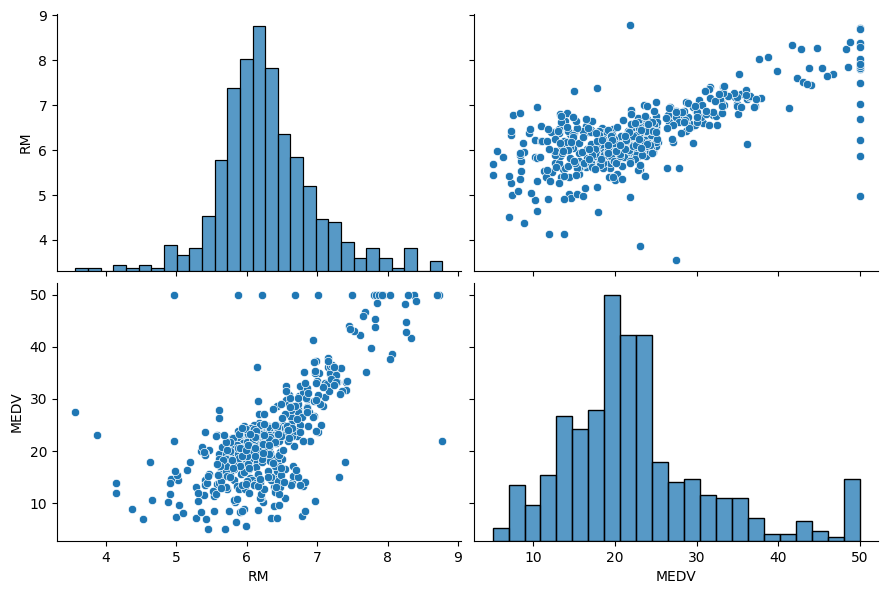

In [7]:
columnas = tools_ML.plot_features_num_regression(df=df_practica_rl, target_col="MEDV", lista_columnas=["NOX","CHAS","RM"], umbral_corr=0.5, umbral_pvalue=0.05, limite_pairplot=2)
print(columnas)

ESTELA

In [26]:
#Esta función recibe como argumentos el dataframe, target_col, umbral_corr, pvalue cuyo valor debe ser por defecto "None".
def get_features_num_regression(df: pd.DataFrame, target_col: str, umbral_corr: float, pvalue: float = None) -> list:
    #la funcion devuelve none si todas las comprobaciones dan error
    #primero: comprueba si la variable target esta en el dataframe
    if target_col not in df.columns: 
        print("Error:", target_col, "no es una columna del dataframe.")
        return None
    #segundo: comprueba si es una variable continua
    elif df[target_col].dtype != np.number:
        print("Error:", target_col, "no es una variable numérica continua.")
        return None
    #tercero: comprueba que el umbral de correlacion este entre 0 y 1
    elif not 0 <= umbral_corr <= 1:
        print("Error:", umbral_corr, "no es un número entre 0 y 1.")
        return None
    #cuarto: comprueba que el pvalue sea distinto de none
    elif pvalue is not None and (not isinstance(pvalue, float) or not 0 <= pvalue <= 1):
        print("Error:", pvalue, "no es un valor adecuado para el p-value.")
        return None

    #definimos la matriz de correlacion
    corr_matrix = df.corr(numeric_only=True)
    corr_target = corr_matrix[[target_col]].abs()
    
    #devuelve las correlaciones que cumplen que el valor absoluto de cada correlacion es mayor que el valor del umbral de correlacion
    corr_target = corr_target[corr_target[target_col] > umbral_corr]
    
    #si el pvalue no es none
    if pvalue is not None:
        #filtra las columnas numericas cuya correlacion con target_col es mayor en valor absoluto al umbral_corr
        #y que supera el test de hipotesis con pvalue mayor o igual a 1
        corr_target = corr_target[[i for i in corr_target.index if i != target_col and pvalue < 1 - stats.pearsonr(df[i], df[target_col])[1]]]
    #devuelve una lista con los índices de las columnas que cumplen las condiciones
    return corr_target.index.tolist()


In [16]:
df_titanic['age'] = pd.to_numeric(df_titanic['age'], errors='coerce') #error=coerce convierte los valores no numericos a nan


In [29]:
#llamamos a la función con diferentes argumentos
#debe imprimir Error: Age no es una columna del dataframe. None
#print(get_features_num_regression(df_titanic, 'Age', 0.5)) 
#debe imprimir ['pclass', 'sibsp', 'parch', 'fare']
a = get_features_num_regression(df=df_titanic, target_col='age', umbral_corr=0.1, pvalue=None) 
#debe imprimir Error: 1.5 no es un número entre 0 y 1. None
#print(get_features_num_regression(df_titanic, 'Age', 1.5))
#debe imprimir Error: d no es un valor adecuado para el p-value. None
#print(get_features_num_regression(df_titanic, 'Age', 0.5, 'd'))  


a


C:\Users\7681\AppData\Local\Temp\ipykernel_22156\1595728741.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  elif df[target_col].dtype != np.number:


['pclass', 'age', 'sibsp', 'parch', 'adult_male', 'alone']